# E-tivity 3: Clustering and Manifold Learning
### MSc in AI - CE6002 & CS5062 
Student Name: Michel Danjou

Student ID: 18263461

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

# Import Python Modules

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

# Task 1
## Load and scale the data

In the next cell we will be performing the following operations:
  * load the csv file into a panda dataset.
  * convert the data to a Numpy array
  * scale the data fro the Numpy array

In [3]:
# Load the data
df = pd.read_csv("loans_dataset_et3.csv")  
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [4]:
# Convert data to np array
df_data = np.array(df.values, dtype=float)

# Scale the data
min_max_scaler = preprocessing.MinMaxScaler()
df_data = min_max_scaler.fit_transform(df_data)

#### Investigate the effect of scaling on the dataset
The graph below hightlights the fact that the scaling preserved the shape of the data. 

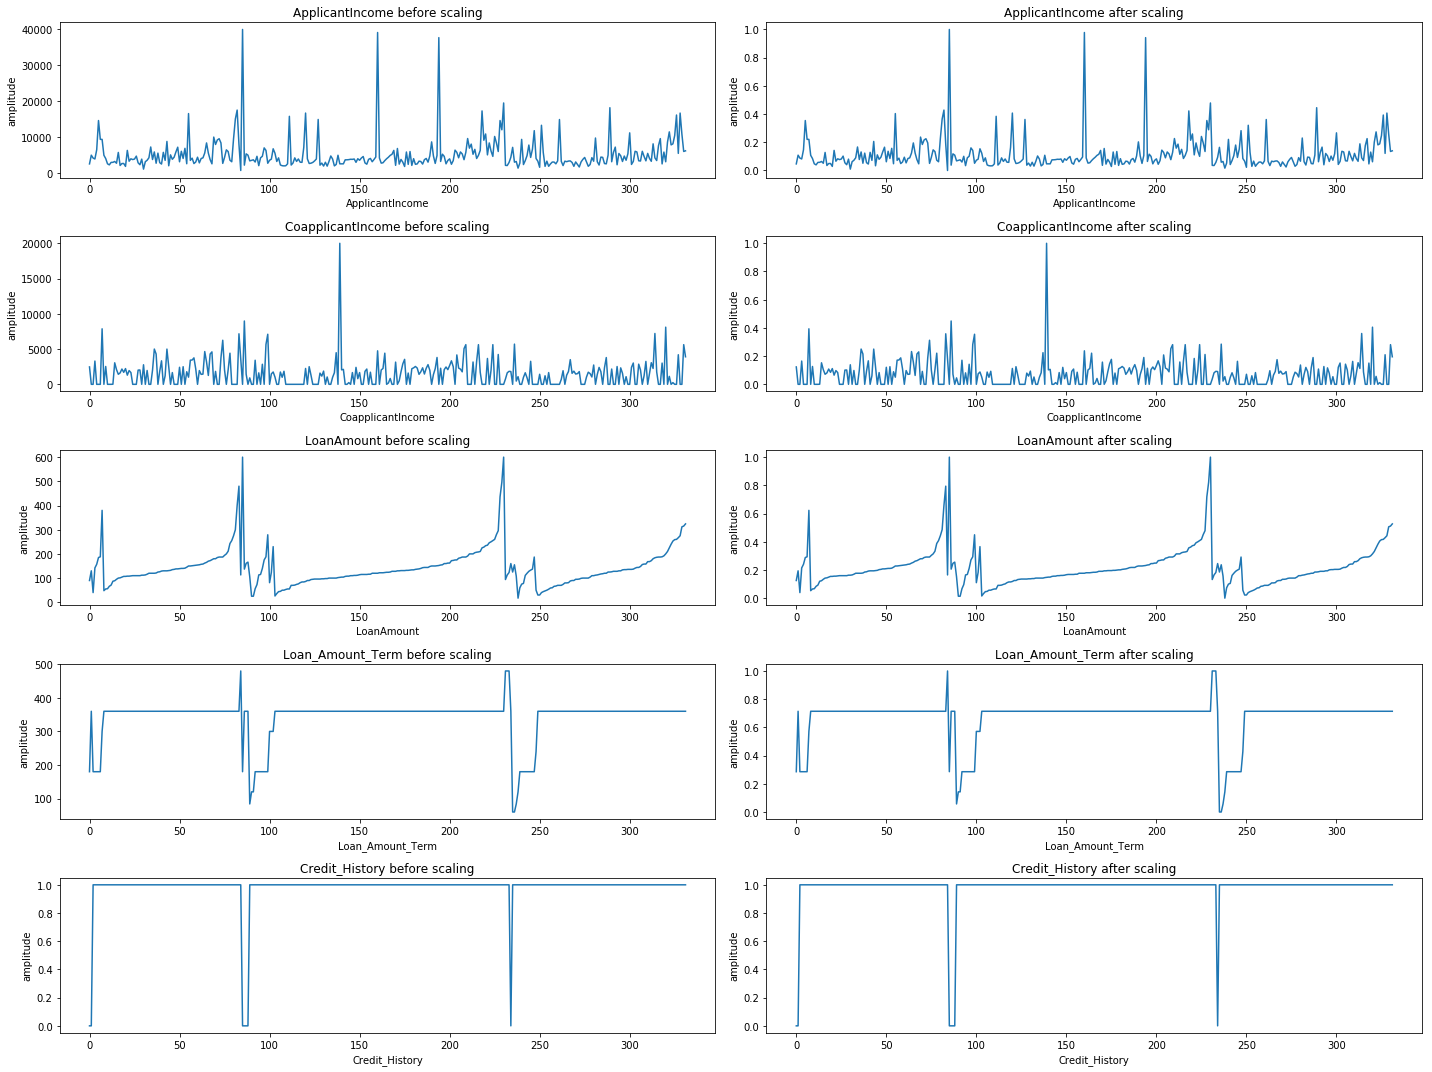

In [5]:
f, axs = plt.subplots(5, 2, figsize=(20, 15))
col_names = df.columns.values.tolist()

for i in range(5):
    
    plt.subplot(5, 2, 2*i+1)
    plt.plot(df.iloc[:,i])
    plt.xlabel(col_names[i])
    plt.ylabel('values')
    plt.title(col_names[i] + " before scaling")

    plt.subplot(5, 2, 2*i+2)
    plt.plot(df_data[:,i])
    plt.xlabel(col_names[i])
    plt.ylabel('values')
    plt.title(col_names[i] + " after scaling")

plt.tight_layout()
plt.show()

#### Search for correlated features by displaying the coorelation matrix
The correlation matrix below shows that the `LoanAmount` is correlated to the `ApplicantIncome` and to a lesser extend to the `CoapplicantIncome`

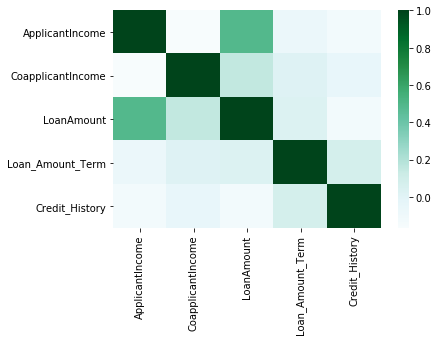

In [6]:
sns.heatmap(df.corr(), cmap='BuGn')

In [7]:
# Scatter plot
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

## KMeans clustering

In [17]:
# Apply KMeans
k = 3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df_data)
#print("\nclustered_data_sklearn:\n", clustered_data_sklearn)
#print("\nclustered_data_sklearn.cluster_centers_:\n", clustered_data_sklearn.cluster_centers_)

# Create new array composed of data + k centers 
df_data_and_centers = np.r_[df_data,clustered_data_sklearn.cluster_centers_]
#print("\ndf_data_and_centers:\n", df_data_and_centers)
#print("\ndf_data_and_centers.shape():\n", df_data_and_centers.shape)

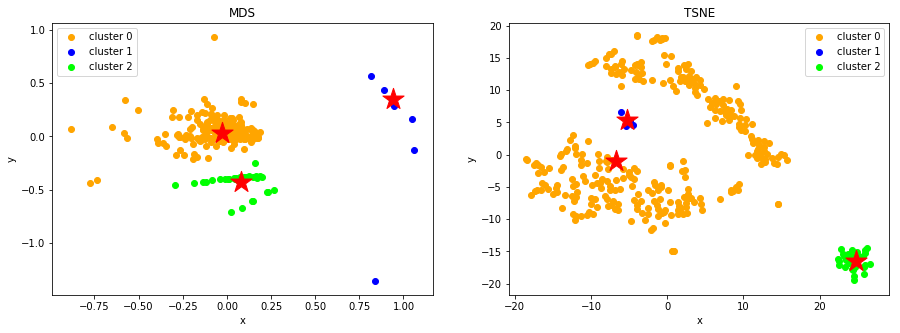

In [9]:
f, axs = plt.subplots(1, 2, figsize=(15, 5))

# MDS
plt.subplot(1, 2, 1)
XYcoordinates = manifold.MDS(n_components=2).fit_transform(df_data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

# TSE
plt.subplot(1, 2, 2)
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(df_data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

plt.show()


In [13]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
0,2483,2466.0,90,180,0,1
1,4917,0.0,130,360,0,1
2,4106,0.0,40,180,1,2
3,3859,3300.0,142,180,1,2
4,6417,0.0,157,180,1,2


In [14]:
df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
327,5417,4196.0,267,360,1,0
328,16666,0.0,275,360,1,0
329,10750,0.0,312,360,1,0
330,5955,5625.0,315,360,1,0
331,6133,3906.0,324,360,1,0


In [16]:
df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,5112.803390,1501.383458,141.827119,360.813559,1.0
1,9153.857143,2098.142857,206.285714,308.571429,0.0
2,5146.966667,1297.126666,116.333333,161.600000,1.0


The correlation matrix shows that the `loanAmount` is mainly correlated to the `ApplicantIncome` and to a lesser extend to the `CoApplicantIncome`

  * Cluster 2: group with **lowest combined income** also have the **lowest mean loan amount and loan amount terms**. 
  * Cluster 1: group with **highest combined income** also have the **higest loan amount** but second hights loan amount terms but have **No credit history?**
  * Cluster 0: group with middle combined income also have middle loan amount but the **highest loan amount terms**


# Task 2